In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Figure configurations
# remove the top and right spines from plot in the global plt setting
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

# change the linewidth of the axes and spines
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["xtick.major.width"] = 2
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.major.width"] = 2
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["xtick.minor.width"] = 2
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["ytick.minor.width"] = 2

# change the fontsize of the ticks label
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

# change the fontsize of the axes label
plt.rcParams["axes.labelsize"] = 20
# change the fontsize of the legend
plt.rcParams["legend.fontsize"] = 20
# change the fontsize of the title
plt.rcParams["axes.titlesize"] = 20
# change the title font size
plt.rcParams["font.size"] = 20

# change the font family to Arial
plt.rcParams["font.family"] = "Arial"

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


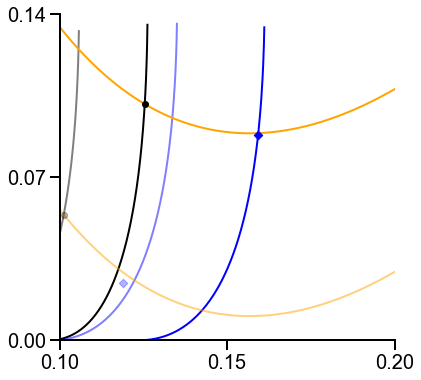

In [10]:
'''
Plot nullclines in stationary condition
'''


def equation_rs(rs, re, I_s):
    return a_s * ((Wse-Wsve)*re + Wss * rs + I_s)**2 - rs   

def equation_rs_DART(rs, re, I_s):
    return a_s * ((Wse*(1-x)-Wsve)*re + Wss * rs + I_s)**2 - rs

def rs_nullcline(re_values, I_s):
    rs_values = []
    for re in re_values:
        rs_initial_guess = 0
        rs_solution = fsolve(equation_rs, rs_initial_guess, args=(re, I_s))[0]
        rs_values.append(rs_solution)
    return rs_values

def rs_nullcline_DART(re_values, I_s):
    rs_values = []
    for re in re_values:
        rs_initial_guess = 0
        rs_solution = fsolve(equation_rs_DART, rs_initial_guess, args=(re, I_s))[0]
        rs_values.append(rs_solution)
    return rs_values

def re_nullcline(re, I_e):
    return (Wee*re + I_e - np.sqrt(re/a_e))/Wes

re_control = np.array([0.1012, 0.1031, 0.1254])
rs_control = np.array([0.0539, 0.0728, 0.1014])
re_DART = np.array([0.1190, 0.1304, 0.1593])  
rs_DART = np.array([0.0246, 0.0463, 0.0883]) 

a_e, a_s = 1.289, 1.481

paras = [1.11236068,  0.15472349,  2.32025426, -3.03305253,  1.07024812, 0.5]

Wee = paras[0]
Wes = paras[1]
Wse = paras[2]
Wsve = paras[3]
Wss = paras[4]
x = paras[5]

IE = np.sqrt(re_control[:] / a_e) - Wee * re_control[:] + Wes * rs_control[:]
IS = np.sqrt(rs_control[:] / a_s) - (Wse - Wsve) * re_control[:] - Wss * rs_control[:]

I_e_low, I_s_low = IE[0], IS[0]
I_e_medium, I_s_medium = IE[1], IS[1]
I_e_high, I_s_high = IE[2], IS[2]
x_range = [0.1, 0.2]
re_values = np.linspace(min(x_range), max(x_range)+0.01, 1000)

rs_nullcline_values_low = rs_nullcline(re_values, I_s_low)
rs_nullcline_values_high = rs_nullcline(re_values, I_s_high)
rs_nullcline_values_low_DART = rs_nullcline_DART(re_values, I_s_low)
rs_nullcline_values_high_DART = rs_nullcline_DART(re_values, I_s_high)

re_nullcline_values_low = re_nullcline(re_values, I_e_low)
re_nullcline_values_high = re_nullcline(re_values, I_e_high)

plt.figure(figsize=(6, 6))

max_index_rs_low = np.argmax(rs_nullcline_values_low)
min_index_rs_low = np.argmin(rs_nullcline_values_low[:max_index_rs_low])
max_index_rs_high = np.argmax(rs_nullcline_values_high)
min_index_rs_high = np.argmin(rs_nullcline_values_high[:max_index_rs_high])
max_index_rs_low_DART = np.argmax(rs_nullcline_values_low_DART)
min_index_rs_low_DART = np.argmin(rs_nullcline_values_low_DART[:max_index_rs_low_DART])
max_index_rs_high_DART = np.argmax(rs_nullcline_values_high_DART)
min_index_rs_high_DART = np.argmin(rs_nullcline_values_high_DART[:max_index_rs_high_DART])

plt.plot(re_values[min_index_rs_low:max_index_rs_low], rs_nullcline_values_low[min_index_rs_low:max_index_rs_low], color='black', alpha=0.5, 
         label='rS Nullcline Low', zorder=1)
plt.plot(re_values[min_index_rs_high:max_index_rs_high], rs_nullcline_values_high[min_index_rs_high:max_index_rs_high], color='black',
            label='rS Nullcline High', zorder=1)
plt.plot(re_values[min_index_rs_low_DART:max_index_rs_low_DART], rs_nullcline_values_low_DART[min_index_rs_low_DART:max_index_rs_low_DART], color='blue', alpha = 0.5,
            linestyle='-', label='rS Nullcline Low DART', zorder=1)
plt.plot(re_values[min_index_rs_high_DART:max_index_rs_high_DART], rs_nullcline_values_high_DART[min_index_rs_high_DART:max_index_rs_high_DART], color='blue', linestyle='-',
            label='rS Nullcline High DART', zorder=1)


plt.plot(re_values, re_nullcline_values_low, color='orange', alpha = 0.5, 
         label='rE Nullcline Low', zorder=1)
plt.plot(re_values, re_nullcline_values_high, color='orange', 
         label='rE Nullcline High', zorder=1)

plt.scatter(re_control[0], rs_control[0], color='black',alpha = 0.3, 
            label='Control Low', zorder=2)
plt.scatter(re_control[2], rs_control[2], color='black', 
            label='Control High', zorder=2)
plt.scatter(re_DART[0], rs_DART[0], color='blue', alpha = 0.3,marker = 'D',
            label='DART Low', zorder=2)
plt.scatter(re_DART[2], rs_DART[2], color='blue', marker = 'D',
            label='DART High', zorder=2)

# plt.title('Nullclines in Stationary Condition')
# plt.xlabel('rE')
# plt.ylabel('rS')
plt.xlim(x_range)
plt.xticks([0.10, 0.15, 0.20])

plt.ylim([0.0, 0.14])
plt.yticks([0.0, 0.07, 0.14])

# plt.legend(loc='upper left', bbox_to_anchor=(0.3,-0.1),ncol=2)
# plt.grid(True)
# plt.savefig('Nullclines stationary.pdf', format='pdf', bbox_inches='tight')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


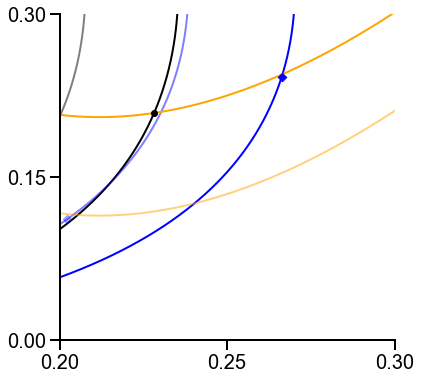

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

'''
Plot nullclines in locomotion condition
'''
def equation_rs(rs, re, I_s):
    return a_s * ((Wse-Wsve)*re + Wss * rs + I_s)**2 - rs   

def equation_rs_DART(rs, re, I_s):
    return a_s * ((Wse*(1-x)-Wsve)*re + Wss * rs + I_s)**2 - rs

def rs_nullcline(re_values, I_s):
    rs_values = []
    for re in re_values:
        rs_initial_guess = 0
        rs_solution = fsolve(equation_rs, rs_initial_guess, args=(re, I_s))[0]
        rs_values.append(rs_solution)
    return rs_values

def rs_nullcline_DART(re_values, I_s):
    rs_values = []
    for re in re_values:
        rs_initial_guess = 0
        rs_solution = fsolve(equation_rs_DART, rs_initial_guess, args=(re, I_s))[0]
        rs_values.append(rs_solution)
    return rs_values

def re_nullcline(re, I_e):
    return (Wee*re + I_e - np.sqrt(re/a_e))/Wes

re_control = np.array([0.1824, 0.1939, 0.2282])
rs_control = np.array([0.1285, 0.1688, 0.2091])
re_DART = np.array([0.2022, 0.2235, 0.2665])
rs_DART = np.array([0.1116, 0.1717, 0.2423])

a_e, a_s = 1.289, 1.481

paras = [0.95685708,  0.07606009,  0.33027868, -0.95030923,  0.72013484, 0.5]

Wee = paras[0]
Wes = paras[1]
Wse = paras[2]
Wsve = paras[3]
Wss = paras[4]
x = paras[5]

IE = np.sqrt(re_control[:] / a_e) - Wee * re_control[:] + Wes * rs_control[:]
IS = np.sqrt(rs_control[:] / a_s) - (Wse - Wsve) * re_control[:] - Wss * rs_control[:]
# print(IE, IS)
I_e_low, I_s_low = IE[0], IS[0]
I_e_medium, I_s_medium = IE[1], IS[1]
I_e_high, I_s_high = IE[2], IS[2]

x_range = [0.20, 0.30]
re_values = np.linspace(min(x_range), max(x_range)+0.01, 1000)

rs_nullcline_values_low = rs_nullcline(re_values, I_s_low)
rs_nullcline_values_high = rs_nullcline(re_values, I_s_high)
rs_nullcline_values_low_DART = rs_nullcline_DART(re_values, I_s_low)
rs_nullcline_values_high_DART = rs_nullcline_DART(re_values, I_s_high)

re_nullcline_values_low = re_nullcline(re_values, I_e_low)
re_nullcline_values_high = re_nullcline(re_values, I_e_high)

plt.figure(figsize=(6, 6))

max_index_rs_low = np.argmax(rs_nullcline_values_low)
min_index_rs_low = np.argmin(rs_nullcline_values_low[:max_index_rs_low])
max_index_rs_high = np.argmax(rs_nullcline_values_high)
min_index_rs_high = np.argmin(rs_nullcline_values_high[:max_index_rs_high])
max_index_rs_low_DART = np.argmax(rs_nullcline_values_low_DART)
min_index_rs_low_DART = np.argmin(rs_nullcline_values_low_DART[:max_index_rs_low_DART])
max_index_rs_high_DART = np.argmax(rs_nullcline_values_high_DART)
min_index_rs_high_DART = np.argmin(rs_nullcline_values_high_DART[:max_index_rs_high_DART])

plt.plot(re_values[min_index_rs_low:max_index_rs_low], rs_nullcline_values_low[min_index_rs_low:max_index_rs_low], color='black', alpha=0.5, 
         label='rS Nullcline Low', zorder=1)
plt.plot(re_values[min_index_rs_high:max_index_rs_high], rs_nullcline_values_high[min_index_rs_high:max_index_rs_high], color='black',
            label='rS Nullcline High', zorder=1)
plt.plot(re_values[min_index_rs_low_DART:max_index_rs_low_DART], rs_nullcline_values_low_DART[min_index_rs_low_DART:max_index_rs_low_DART], color='blue', alpha = 0.5,
            linestyle='-', label='rS Nullcline Low DART', zorder=1)
plt.plot(re_values[min_index_rs_high_DART:max_index_rs_high_DART], rs_nullcline_values_high_DART[min_index_rs_high_DART:max_index_rs_high_DART], color='blue', linestyle='-',
            label='rS Nullcline High DART', zorder=1)

plt.plot(re_values, re_nullcline_values_low, color='orange', alpha = 0.5, 
         label='rE Nullcline Low', zorder=1)
plt.plot(re_values, re_nullcline_values_high, color='orange', 
         label='rE Nullcline High', zorder=1)

plt.scatter(re_control[0], rs_control[0], color='black',alpha = 0.3, 
            label='Control Low', zorder=2)
plt.scatter(re_control[2], rs_control[2], color='black', 
            label='Control High', zorder=2)
plt.scatter(re_DART[0], rs_DART[0], color='blue', alpha = 0.3,marker = 'D',
            label='DART Low', zorder=2)
plt.scatter(re_DART[2], rs_DART[2], color='blue', marker = 'D',
            label='DART High', zorder=2)

# plt.title('Nullclines in Locomotion Condition')
# plt.xlabel('rE')
# plt.ylabel('rS')
plt.xlim(x_range)
plt.xticks([0.20, 0.25, 0.30])
plt.ylim([0.0, 0.30])
plt.yticks([0.0, 0.15, 0.3])

# plt.legend(loc='upper left', bbox_to_anchor=(0.3,-0.1),ncol=2)
# plt.grid(True)
# plt.savefig('Nullclines Locomotion.pdf', format='pdf', bbox_inches='tight')
plt.show()
